# Load and inspect the file ‘ASA All NBA Raw Data.csv’, which is raw NBA data for the time range 2019-10-22 to 2022-02-27.

In [ ]:
import pandas as pd
import sweetviz as sv
import numpy as np

from matplotlib import pyplot as plt
from pathlib import Path
from zipfile import ZipFile
from io import BytesIO

In [97]:
zip_path = Path("local_data/ASA All NBA Raw Data.zip")
z = ZipFile(BytesIO(zip_path.read_bytes()))
df = pd.read_csv(z.open("ASA All NBA Raw Data.csv"))
df.head()

C:\Users\ler_s\AppData\Local\Temp\ipykernel_12352\3735818334.py:3: DtypeWarning: Columns (68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(z.open("ASA All NBA Raw Data.csv"))


,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,...,pf_per_minute,ts,last_60_minutes_per_game_starting,last_60_minutes_per_game_bench,PG%,SG%,SF%,PF%,C%,active_position_minutes
0,202202270CHO,2022-02-27,1,A,DET,127,96.3,0.518,10.6,39.3,...,0.051858,19.32,34.047024,18.329358,0.0,7.0,50.0,44.0,0.0,NaN
1,202202270CHO,2022-02-27,1,A,DET,127,96.3,0.518,10.6,39.3,...,0.120060,19.00,29.825758,0.000000,0.0,0.0,2.0,94.0,4.0,NaN
2,202202270CHO,2022-02-27,1,A,DET,127,96.3,0.518,10.6,39.3,...,0.122324,18.64,30.957143,0.000000,2.0,83.0,15.0,0.0,0.0,NaN
3,202202270CHO,2022-02-27,1,A,DET,127,96.3,0.518,10.6,39.3,...,0.173410,9.88,25.828472,13.904867,0.0,0.0,0.0,2.0,98.0,NaN
4,202202270CHO,2022-02-27,1,A,DET,127,96.3,0.518,10.6,39.3,...,0.090293,4.88,28.463725,25.170000,94.0,6.0,0.0,0.0,0.0,NaN


In [98]:
df.shape

(113125, 81)

# Cleaning Data

## cleaning all numeric fields

In [104]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# add manual numeric columns
manual_numeric_cols = ['FDP_per_minute', 'SDP_per_minute','DKP_per_minute']

num_cols.extend(manual_numeric_cols)

print(f"Numeric columns to clean: {num_cols}")

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

Numeric columns to clean: ['OT', 'Team_Score', 'Team_pace', 'Team_efg_pct', 'Team_tov_pct', 'Team_orb_pct', 'Team_ft_rate', 'Team_off_rtg', 'Opponent_Score', 'Opponent_pace', 'Opponent_efg_pct', 'Opponent_tov_pct', 'Opponent_orb_pct', 'Opponent_ft_rate', 'Opponent_off_rtg', 'starter', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus', 'did_not_play', 'is_inactive', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm', 'season', 'minutes', 'double_double', 'triple_double', 'DKP', 'FDP', 'SDP', 'FDP_per_minute', 'SDP_per_minute', 'pf_per_minute', 'ts', 'last_60_minutes_per_game_starting', 'last_60_minutes_per_game_bench', 'PG%', 'SG%', 'SF%', 'PF%', 'C%', 'active_position_minutes', 'FDP_per_minute', 'SDP_per_minute', 'DKP_per_minute']


## Convert Text Field to Date Data Type

In [107]:
df['game_date']= pd.to_datetime(df['game_date'], errors='coerce')

# Data Investigation

In [108]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113125 entries, 0 to 113124
Data columns (total 81 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   game_id                            113125 non-null  object        
 1   game_date                          113125 non-null  datetime64[ns]
 2   OT                                 113125 non-null  int64         
 3   H_A                                113125 non-null  object        
 4   Team_Abbrev                        113125 non-null  object        
 5   Team_Score                         113125 non-null  int64         
 6   Team_pace                          113125 non-null  float64       
 7   Team_efg_pct                       113125 non-null  float64       
 8   Team_tov_pct                       113125 non-null  float64       
 9   Team_orb_pct                       113125 non-null  float64       
 10  Team_ft_rate        

In [109]:
report = sv.analyze(df)
report.show_html("sweetviz_eda.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Perform k-means clustering

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [145]:
kmeans = KMeans(n_clusters=5, n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
# Fitting with inputs
kmeans = kmeans.fit(df[num_cols])
# Getting the cluster centers
C = kmeans.cluster_centers_

print(f"Cluster Centers ({C.shape}): \n{C}")
# Predicting the clusters
item_labels = kmeans.labels_
print(f"\nCuster Labels ({len(item_labels)}): \n{item_labels}")

Cluster Centers ((5, 72)): 
[[ 5.71052814e-02  1.10378521e+02  9.87894546e+01  5.27892746e-01
   1.21312695e+01  2.24470063e+01  1.94256697e-01  1.11136021e+02
   1.11838617e+02  9.87894546e+01  5.35921472e-01  1.21140790e+01
   2.26390912e+01  1.97717796e-01  1.12605994e+02  4.92247525e-01
   4.10555825e+00  9.40880460e+00  4.19628954e-01  1.48657161e+00
   4.16044854e+00  3.05387035e-01  1.70128746e+00  2.13006160e+00
   4.53581089e-01  6.32449644e-01  2.79673981e+00  3.42918945e+00
   2.89686440e+00  8.31210632e-01  3.04353845e-01  1.42188690e+00
   1.84152419e+00  1.13989756e+01 -6.05073718e-01  2.08999484e-14
  -1.47451495e-16  5.35512286e-01  4.99810826e-01  4.51954593e-01
   2.38551533e-01  3.00314252e+00  1.23330138e+01  7.64238250e+00
   1.71882086e+01  1.62836575e+00  1.14235135e+00  1.20599121e+01
   2.00047069e+01  1.08999169e+02  1.13861978e+02 -1.16946079e+00
   2.02107206e+03  2.46208284e+01  4.66878937e-02  4.67225029e-03
   2.24182789e+01  2.18441060e+01  2.28428999e+0

## k-means clustering visualization

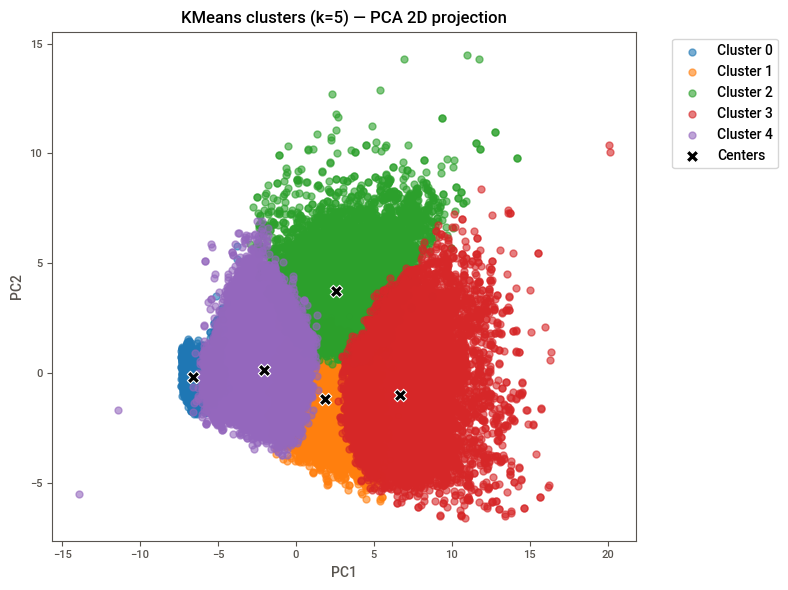

Cluster sizes:
0    21545
1    34392
2    14347
3    14871
4    27970


In [ ]:
# 2D KMeans clusters plot (PCA projection of scaled features)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choose number of clusters (set from elbow result)
selected_k = 5  # change to the k you picked from the elbow plot

# Ensure scaled matrix X exists; otherwise (re)compute from num_cols
try:
    X  # noqa: F821
except NameError:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(df[num_cols])

# Fit KMeans on scaled features and get labels
kmeans_2d = KMeans(n_clusters=selected_k, n_init='auto', random_state=42)
labels = kmeans_2d.fit_predict(X)

# PCA to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Project cluster centers into PCA space
centers = kmeans_2d.cluster_centers_
centers_pca = pca.transform(centers)

# Plot clusters and centers
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', n_colors=max(3, selected_k))
for i in range(selected_k):
    mask = labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=25, color=palette[i], alpha=0.6, label=f'Cluster {i}')

# smaller center marker 'X' with slight edge for visibility
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=80, c='black', marker='X', label='Centers', linewidths=0.8, edgecolors='white')

plt.title(f'KMeans clusters (k={selected_k}) — PCA 2D projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Show cluster sizes
cluster_counts = pd.Series(labels).value_counts().sort_index()
print('Cluster sizes:')
print(cluster_counts.to_string())

## Try finding the optimal number of clusters

### Elbow Method

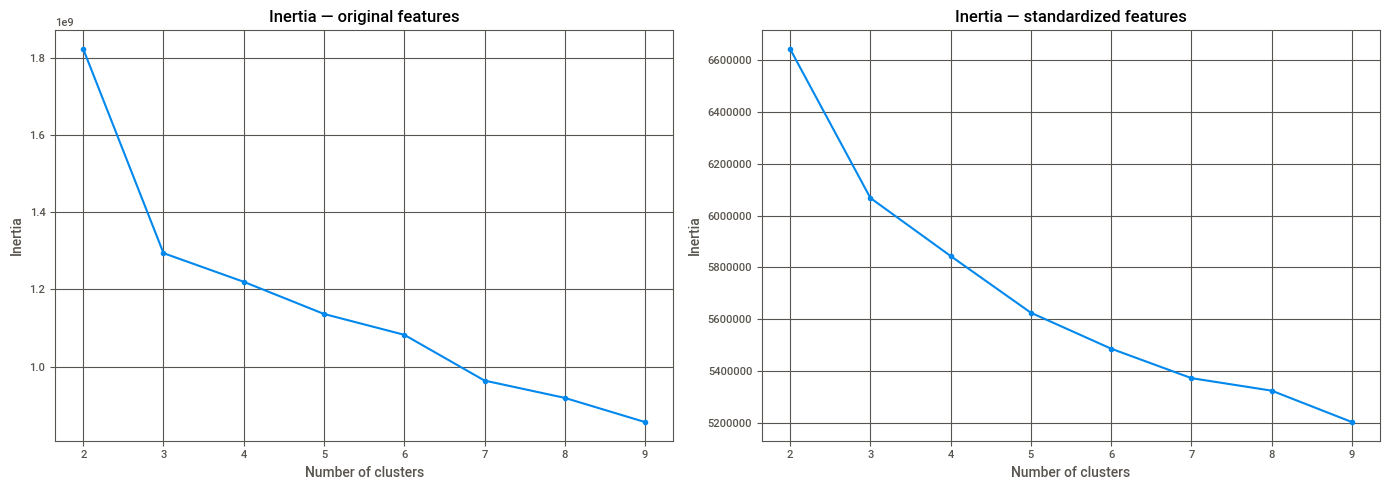

In [ ]:
# Compute inertia across different cluster counts and plot two graphs side-by-side
n_clusters_vector = list(range(2, 10))

# -----------------------------------------------------------------------
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X = scaler.fit_transform(df[num_cols])
X.shape
# -----------------------------------------------------------------------
n_clusters_default_quality = []
n_clusters_scaler_quality = []

for n_clusters in n_clusters_vector:
    # kmeans on original (unscaled) numeric columns
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans = kmeans.fit(df[num_cols])
    n_clusters_default_quality.append(kmeans.inertia_)

    # kmeans on scaled data (X should be computed earlier via StandardScaler)
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans = kmeans.fit(X)
    n_clusters_scaler_quality.append(kmeans.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(n_clusters_vector, n_clusters_default_quality, marker='o')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Inertia — original features')
axes[0].grid(True)

axes[1].plot(n_clusters_vector, n_clusters_scaler_quality, marker='o')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Inertia — standardized features')
axes[1].grid(True)

plt.tight_layout()
plt.show()